# Gradient Boosting Machines GBM
* AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur.
* Artıklar(gerçek değerler ile tahmin edilen değerler arasında ki farklar ) üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.
* 2001 Friedman
----
* Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.
* sSeri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/hatalarının(residuals) üzerine kurularak(fit) oluşturulur.
* GBM diferansiyellenebilen herhangi bir kayıp(loss) fonksiyonunu optimize edebilen Gradient Desccent algoritmasını kullanmakta.(GBM'i gbm yapan özellik)
* GB bir çok temel öğrenici tipi (base learner type) kullanabilir.(Trees,linear terms,splines,...)
* Cost fonkisyonları ve link fonksiyonları modifiye edilebilirdir.
* Boosting + Gradient descent
------------
### Boosting yöntemlerine giriş
* Zayıf öğrenicileri bir araya getirip güçlü bir öğrenici ortaya çıkarmak fikrine dayanır. (Kearns ve Valiant 1990)
* kötü tahmin, Gerçek değerler ile tahmin edilen değerlerin farkının karelerinin alınması sonucunda ortaya çıkan büyük değer (MSE). Kötü tahminde bulunan ağaçlara da zayıf tahminciler denir.
--------------
### Adaptive Boosting (1996-1999) AdaBoost
* Zayıf sınıflandırıcıların(classification problemleri için denemişler) bir araya gelerek güçlü bir oluşturması fikrini hayata geçiren Algoritmalardır. Son eklemeli gibi düşünülebilir.
-----------------

library

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('diabetes.csv')
y= df['Outcome']
X= df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


model ve tahmin

In [5]:
gbm= GradientBoostingClassifier().fit(X_train,y_train)

In [6]:
?gbm

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        c:\users\ycanf\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage ``n_classes_`` regression trees are fit on the negative gradient
of the loss function, e.g. binary or multiclass log loss. Binary
classification is a special case where only a single regression tree is
induced.

:class:`sklearn.ensemble.HistGradientBoostingClassifier` is a much faster
variant of this algorithm for intermediate datasets (`n_samples >= 10_000`).

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'log_loss', 'exponential'}, default='log_loss'
    The loss function to be optimized. 'log_loss' refers to binomial and
    multinomial deviance, the same a

In [9]:
gbm.score(X_test,y_test)

0.7445887445887446

tune

In [11]:
gbm= GradientBoostingClassifier()

In [16]:
gbm_param= {'learning_rate' : [0.1,0.01,0.001,0.05],
           'n_estimators' : [100,300,500,1000],
           'max_depth' : [2,3,5,8]}

In [17]:
gbm_cv = GridSearchCV(gbm,gbm_param,cv=10,n_jobs=-1,verbose=2)

Invalid parameter 'as' for estimator GradientBoostingClassifier(). Valid parameters are: ['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'].

In [18]:
gbm_cv.fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.05],
                         'max_depth': [2, 3, 5, 8],
                         'n_estimators': [100, 300, 500, 1000]},
             verbose=2)

In [20]:
gbm_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=300)

In [21]:
gbm_tune = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=300).fit(X_train,y_train)

In [22]:
gbm_tune.score(X_test,y_test)

0.7445887445887446

# DEGİSKEN ÖNEM

In [23]:
Importance = pd.DataFrame({'Importance': gbm_tune.feature_importances_},
                         index= X_train.columns)

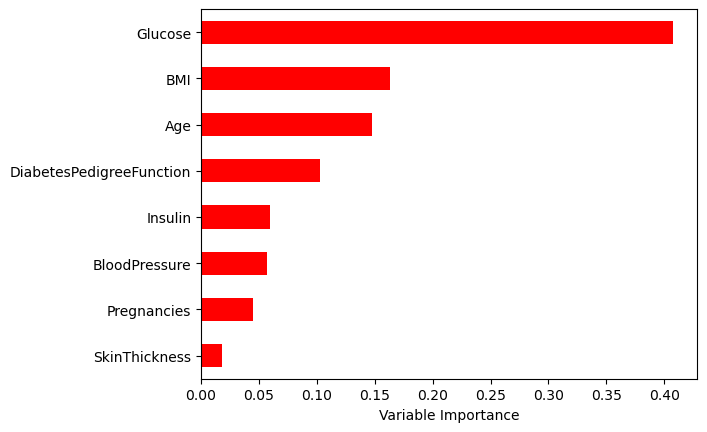

In [24]:
Importance.sort_values(by = 'Importance', axis = 0 , ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

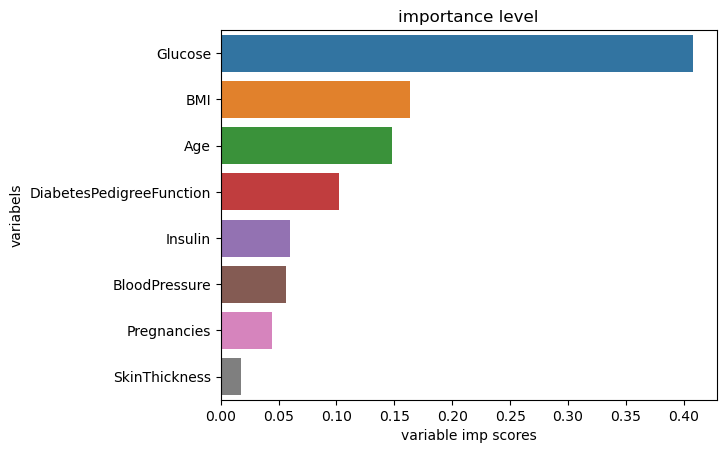

In [25]:
feature_imp = pd.Series(gbm_tune.feature_importances_,index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y= feature_imp.index)
plt.xlabel('variable imp scores')
plt.ylabel('variabels')
plt.title('importance level')
plt.show()